# Fluctuations

## Preamble

In [1]:
%load_ext autoreload

In [69]:
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../')
import fluctuations

import matplotlib.pyplot as plt

import numpy as np
from scipy.interpolate import interp1d

In [5]:
import matplotlib.pylab as pylab
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Velocity Fluctuations

In [6]:
v_fluc = fluctuations.Velocity_Fluctuations()

### Velocity Correlation Functions

(1, 1000.0)

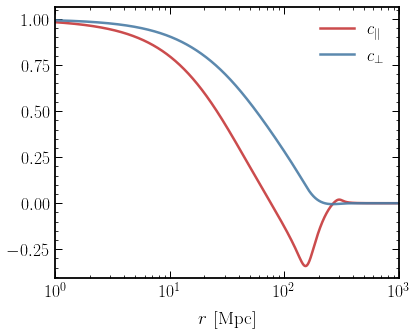

In [13]:
x_ary = np.arange(0, 1000, 0.001)

plt.figure()

plt.xscale('log')

plt.plot(x_ary, v_fluc.cparint(x_ary), label=r'$c_\parallel$')

plt.plot(x_ary, v_fluc.cperpint(x_ary), label=r'$c_\perp$')

plt.legend()

plt.xlabel('$r$ [Mpc]')

plt.xlim(1, 1e3)

### Velocity Power Spectra

In [45]:
k_ary = np.logspace(-3, 1, num=600)

_, Delta2_vrel  = v_fluc.Delta2_v(k_ary) 

_, Delta2_vrel2 = v_fluc.Delta2_v2(k_ary)

k_vrel_fft, Delta2_vrel_fft = v_fluc.Delta2_v(use_logfft=True) 

k_vrel2_fft, Delta2_vrel2_fft = v_fluc.Delta2_v2(use_logfft=True)

Text(0, 0.5, '$\\Delta_{v^2}^2$ [km$^4$ s$^{-4}$]')

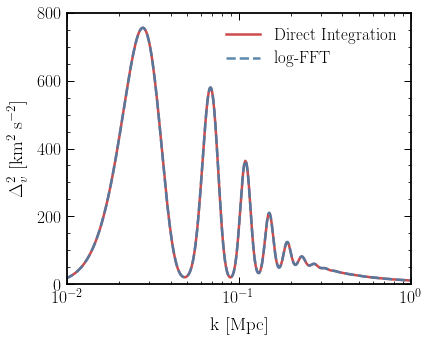

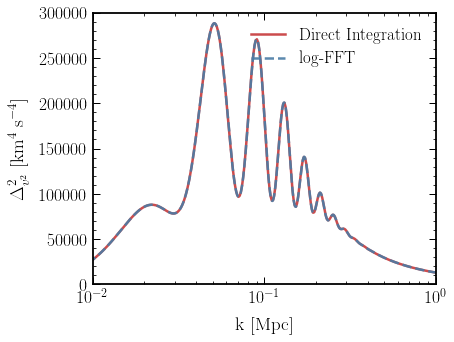

In [46]:
plt.figure()

plt.semilogx(k_ary, Delta2_vrel, label='Direct Integration')
plt.semilogx(k_vrel_fft, Delta2_vrel_fft, '--', label='log-FFT')

plt.legend()

plt.xlim(1e-2, 1)
plt.ylim(0, 800)

plt.xlabel(r'k [Mpc]')
plt.ylabel(r'$\Delta_v^2$ [km$^2$ s$^{-2}$]')

plt.figure()

plt.semilogx(k_ary, Delta2_vrel2, label='Direct Integration')
plt.semilogx(k_vrel2_fft, Delta2_vrel2_fft, '--', label='log-FFT')

plt.legend()

plt.xlim(1e-2, 1)
plt.ylim(0, 3e5)


plt.xlabel(r'k [Mpc]')
plt.ylabel(r'$\Delta_{v^2}^2$ [km$^4$ s$^{-4}$]')

In [47]:
norm_Delta2_vrel = np.trapz(Delta2_vrel / k_ary, k_ary) 
print('Delta_v^2 is normalized to sigma_3D^2: ', norm_Delta2_vrel, 29**2)

norm_Delta2_vrel2 = np.trapz(Delta2_vrel2 / k_ary, k_ary) 
print('Delta_v^2 is normalized to (2/3) * sigma_3D^4: ', norm_Delta2_vrel2, (2/3) * 29**4)

Delta_v^2 is normalized to sigma_3D^2:  840.0686943914541 841
Delta_v^2 is normalized to (2/3) * sigma_3D^4:  470293.9807906768 471520.6666666666


## Temperature Fluctuations

### Initialization - $x_\alpha$ Data ###

In [50]:
from scipy.io import loadmat
xA_param = loadmat('/users/hongwan/Dropbox (Princeton)/Fluctuations/for_Hongwan/xA_from_Anastasia/PT_LyACMB_NoRad.mat')
xA_data = loadmat('/users/hongwan/Dropbox (Princeton)/Fluctuations/for_Hongwan/xA_from_Anastasia/xA_LyACMB_NoRad.mat')

# These are the entries where X-ray heating is small. Pick any of these indices. 
print('Some indices where xA < 1e-3: ', np.argwhere(xA_param['PTout'][:,3] < 1e-3).flatten()[-7:])

ind = 3184

print('Parameters: ', xA_param['PTout'][ind, :])

xA_z_ary = np.arange(6., 51.)

xA_ary = xA_data['xAout'][ind] 

# In preparation for log-interpolation
xA_ary[xA_ary <= 0] = 1e-100

log10_xA_int = interp1d(xA_z_ary, np.log10(xA_ary))

Indices where xA < 1e-3:  [3165 3170 3171 3175 3182 3184 3187]
Parameters:  [2.30000000e+01 5.81142300e-02 1.51778890e+01 6.38692123e-04
 1.30000000e+00 7.00000000e-01 5.98084785e+01 9.31983920e-02
 0.00000000e+00]


(0.001, 1000.0)

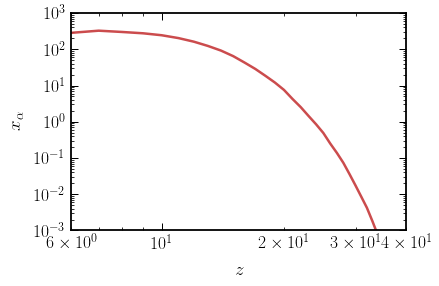

In [54]:
plt.figure()

plt.loglog()

plt.plot(xA_z_ary, xA_data['xAout'][ind,:])

plt.xlabel(r'$z$')
plt.ylabel(r'$x_\alpha$')

plt.xlim(6, 40)
plt.ylim(1e-3, 1e3)

### Initialization - Temperature Data ###

In [66]:
data_folder = '/users/hongwan/Dropbox (Princeton)/Fluctuations/Vrel_scan/extended_redshift_data_fixed_He_bug/'

mm_string = '30_MeV'

Vlis = np.loadtxt(open(data_folder+'Vlis.csv'), delimiter=',')
Qlis = np.loadtxt(open(data_folder+'Qlis.csv'), delimiter=',')
zlis = np.loadtxt(open(data_folder+'zlis.csv'), delimiter=',')

# dimensions zlis x Qlis x Vlis
data = np.array([np.loadtxt(data_folder+'mc100MeV_mm'+mm_string+'_z_'+str(int(z))+'.csv', delimiter=',') for z in zlis])

### Converting to 21-cm Brightness Temperature

16.5